## Problem Description
Given dataset contains data of feedback give by customers.

It contains a total of five categories: 'Bug', 'comments', 'complaints', 'meaningless', 'requests'.

My task was to build a model to predict the categories of feedback.


## Content
1.  Introduction
2. Data Injection
3. Data Visualisation
4. Data Cleaning and Preparation
5. Training                                                                                                                                                                                                                                                           
5.1. One Vs All                                                                                                                                                                                                                                    
5.2.Artificial Neural Network
6. Evaluation by graph
7. Prediction
8. Saving model

In [1]:
#importing libareris
import pandas as pd
import numpy as np
import os
#For visualization
import matplotlib.pyplot as plt
import seaborn as sns
# For Transforming our target vatiable
from keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
#For preprocessing text data
import re
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Data Injection

In [2]:
path1='../input/bugs.txt'
print(path1)
path2='../input/comments.txt'
print(path2)
path3='../input/complaints.txt'
print(path3)
path4='../input/meaningless.txt'
print(path4)
path5='../input/requests.txt'
print(path5)


../input/bugs.txt
../input/comments.txt
../input/complaints.txt
../input/meaningless.txt
../input/requests.txt


In [3]:
def text_data(path):
    text_Body=[]
    with open(path, "r", encoding='windows-1256') as f:
        lines = f.readlines()
            #print(lines) 
        text_Body.append(lines)
    text_body_appended=[]
    for i in range(0,len(text_Body[0])):
        value=text_Body[0][i]
        text_body_appended.append(value)
    return text_body_appended

In [4]:
bugs=text_data(path1)
comments=text_data(path2)
complaints=text_data(path3)
meaningless=text_data(path4)
requests=text_data(path5)

## Data Visualisation

In [5]:
print(len(bugs))
print(len(comments))
print(len(complaints))
print(len(meaningless))
print(len(requests))

72
1759
950
306
103


In [6]:
def data_frame(txt,category):
    column_names=('text','Category')
    df = pd.DataFrame(columns=column_names)
    df['text']=txt
    df['Category']=category
    return df

In [7]:
data=data_frame(bugs,"Bug")
data=data.append(data_frame(comments,"comments"))
data=data.append(data_frame(complaints,"complaints"))
data=data.append(data_frame(meaningless,"meaningless"))
data=data.append(data_frame(requests,"requests"))

In [8]:
data['Category'].unique()

array(['Bug', 'comments', 'complaints', 'meaningless', 'requests'],
      dtype=object)

In [9]:
data.head()

,text,Category
0,A lot of the time my purchase won't show up.\n,Bug
1,I only see the notification if I catch it live...,Bug
2,When I type the typing area should slide above...,Bug
3,"I ran it, and promptly got driver problems wit...",Bug
4,Still calls keep dropping with the new updates\n,Bug


In [10]:
data.groupby(['Category']).size()

Category
Bug              72
comments       1759
complaints      950
meaningless     306
requests        103
dtype: int64

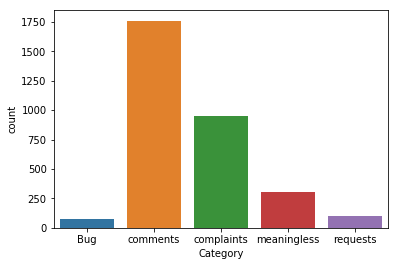

In [11]:
sns.countplot(x='Category',data=data,order=['Bug', 'comments', 'complaints', 'meaningless', 'requests'])
plt.show()

## Data Cleaning and Preparation

In [12]:
#remove link starts with https
data['text'] = data['text'].map(lambda x:re.sub('http.*','',str(x)))
#removing data and time (numeric values)
data['text'] = data['text'].map(lambda x:re.sub('[0-9]','',str(x)))
#removing \n
data['text'] = data['text'].map(lambda x:re.sub('[\\n]','',str(x)))
#removing some special characters
data['text'] = data['text'].map(lambda x:re.sub('[#|*|$|:|\\|&]','',str(x)))


In [13]:
my_stopwords = ['jan','january','february' 'feb', 'march', 'april', 'may', 'june','july','aug',
                    'october','October','june','july','February','apr','Apr','february','jun','jul','feb','sep',
                    'august','sept','september','oct','october','nov','november','dec','december','mar','november october','wasnt']

In [14]:
#preparing train data
#removing stopwords and tokenizing it.
stop=stopwords.words('english')
text=[]
none=data['text'].map(lambda x:text.append(' '.join
       ([word for word in str(x).strip().split() if not word in set(stop) and word not in my_stopwords])))
tfid=TfidfVectorizer(strip_accents=None,lowercase=False,preprocessor=None)
x_features=tfid.fit_transform(text).toarray()
x_features=pd.DataFrame(x_features)

## Training

## One Vs All

In [15]:
#preparing target variable
target=data['Category']
label=LabelEncoder()
target=label.fit_transform(target)
target=to_categorical(target)

In [16]:
target=pd.DataFrame(data=target,columns=['Bug', 'comments', 'complaints', 'meaningless', 'requests'])
target.head()

,Bug,comments,complaints,meaningless,requests
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [17]:
#training with One Vs All(One VS Rest)
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression as lg
logistic=lg(penalty='l2',solver='newton-cg',C=5,multi_class='ovr',max_iter=5000)#using multiclass as ovr(one vs rest)

**Training Bugs vs all**

In [18]:
acc=cross_val_score(estimator=logistic,X=x_features.iloc[:144,:],y=target.iloc[:144,0],cv=5)
acc.mean()

0.8200000000000001

**Training comments vs all**

In [19]:
acc=cross_val_score(estimator=logistic,X=x_features.iloc[100:2100,:],y=target.iloc[100:2100,1],cv=5)
acc.mean()

0.8645083969274807

**Training  complaints vs all**

In [20]:
acc=cross_val_score(estimator=logistic,X=x_features.iloc[1500:3500,:],y=target.iloc[1500:3500,2],cv=5)
acc.mean()

0.6124260355029586

**Training meaningless vs all**

In [21]:
acc=cross_val_score(estimator=logistic,X=x_features.iloc[1500:3500,:],y=target.iloc[1500:3500,2],cv=5)
acc.mean()

0.6941155718769857

**Training requests vs all**

In [22]:
acc=cross_val_score(estimator=logistic,X=x_features.iloc[-206:,:],y=target.iloc[-206:,4],cv=5)
acc.mean()

0.7230952380952381

> *As we can clearly see that 'comment' got the best accuracy (abour 87%) this is because  of its the bigger data size which making our moldel inclined towards comments*

## Artificial Neural Network

In [23]:
#lets dig deeper and apply Deep learning for better accuracy
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras import regularizers
from keras.layers import Dropout

In [24]:
x_features.shape

(3190, 5193)

### Preparing target variable for ANN

In [25]:
#preparing target variable
target=data['Category']
label=LabelEncoder()
target=label.fit_transform(target)
target=to_categorical(target)

In [26]:
target=pd.DataFrame(data=target,columns=['Bug', 'comments', 'complaints', 'meaningless', 'requests'])
target.head()

,Bug,comments,complaints,meaningless,requests
0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [27]:
clf=Sequential()
#adding layers to ANN
clf.add(Dense(units=2048,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001),input_dim=5193))
clf.add(Dropout(0.2))
#adding two more hidden layer to ANN
clf.add(Dense(units=2048,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001)))
clf.add(Dropout(0.2))
clf.add(Dense(units=2048,activation="relu",kernel_initializer="uniform",kernel_regularizer=regularizers.l2(0.001)))
clf.add(Dropout(0.2))
#adding output layer
clf.add(Dense(units=5,activation="softmax",kernel_initializer="uniform"))
#compiling ANN
clf.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [28]:
#fitting ANN
hist=clf.fit(x_features,target,batch_size=32,epochs=24)

Epoch 1/24
3190/3190 [==============================] - 8s 3ms/step - loss: 4.3694 - acc: 0.5734
Epoch 2/24
3190/3190 [==============================] - 3s 1ms/step - loss: 1.1357 - acc: 0.7053
Epoch 3/24
3190/3190 [==============================] - 3s 1ms/step - loss: 0.9241 - acc: 0.7803
Epoch 4/24
3190/3190 [==============================] - 3s 1ms/step - loss: 0.7969 - acc: 0.8298A: 0s - loss: 0.7944 - acc: 0.83
Epoch 5/24
3190/3190 [==============================] - 3s 1ms/step - loss: 0.7319 - acc: 0.8542
Epoch 6/24
3190/3190 [==============================] - 3s 1ms/step - loss: 0.6833 - acc: 0.8690
Epoch 7/24
3190/3190 [==============================] - 3s 1ms/step - loss: 0.6058 - acc: 0.8887
Epoch 8/24
3190/3190 [==============================] - 3s 1ms/step - loss: 0.5725 - acc: 0.8934
Epoch 9/24
3190/3190 [==============================] - 3s 1ms/step - loss: 0.5486 - acc: 0.9016
Epoch 10/24
3190/3190 [==============================] - 3s 1ms/step - loss: 0.5154 - acc: 0.90

## Evaluation by Graph

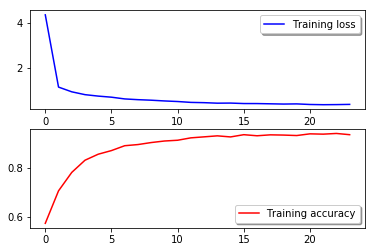

In [29]:
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(hist.history['loss'], color='b', label="Training loss")
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(hist.history['acc'], color='r', label="Training accuracy")
legend = ax[1].legend(loc='best', shadow=True)

## Prediction

In [31]:
test=["A lot of the time my purchase won't show up.\n",
      'There should be a Free Demo Mode :/\n',
      "App constantly crashes and looks like it was designed in 2009... Have to open the app multiple times before I get to a login screen, usually receiving a 'not responding' error.\n"]

In [32]:
test=pd.DataFrame(test,columns=['text'])

In [33]:
#remove link starts with https
test['text'] = test['text'].map(lambda x:re.sub('http.*','',str(x)))
#removing data and time (numeric values)
test['text'] = test['text'].map(lambda x:re.sub('[0-9]','',str(x)))
#removing some special characters
test['text'] = test['text'].map(lambda x:re.sub('[#|*|$|:|\\|&]','',str(x)))

In [34]:
#preparing data
#removing stopwords and tokenizing it.
stop=stopwords.words('english')
text=[]
none=test['text'].map(lambda x:text.append(' '.join
       ([word for word in str(x).strip().split() if not word in set(stop)])))
x_features_test=tfid.transform(text).toarray()
x_features_test=pd.DataFrame(x_features_test)

**Predicting by ANN model**

In [35]:
results=clf.predict(x_features_test)

In [36]:
# select the indix with the maximum probability
results = np.argmax(results,axis = 1)
results

array([0, 4, 2])

**All predictions are correct**

In [37]:
results=pd.DataFrame(results,columns=['Category'])
int_category={0:'Bug', 1:'comments', 2:'complaints', 3:'meaningless', 4:'requests'}
results['Category']=results['Category'].apply(lambda x:int_category[x])
results['text']=test['text']

In [38]:
results

,Category,text
0,Bug,A lot of the time my purchase won't show up.\n
1,requests,There should be a Free Demo Mode /\n
2,complaints,App constantly crashes and looks like it was d...


## Saving model

In [39]:
clf.save('feedback_clfr.h5')

****